In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#  from sklearn.preprocessing import LabelEncoder
#  le=LabelEncoder()
# for col in df.columns:
#     if df[col].dtypes in['object']:
#         df[col]= le.fit_transform(df[col])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

X = df.drop('Outcome',axis=1)
y = df['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=42)

In [8]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Axes(0.125,0.11;0.62x0.77)


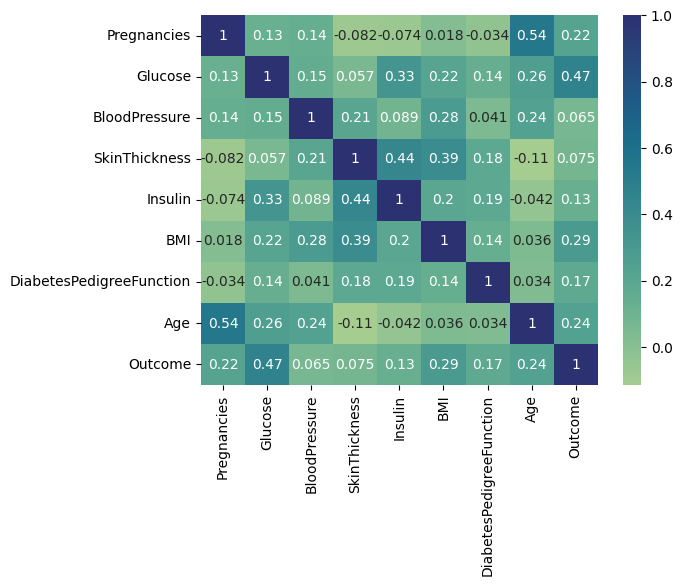

In [16]:
import seaborn as sns
# print(sns.heatmap(df.loc[:10],annot=True,cmap="crest"))#rows 0 to 10-loc
print(sns.heatmap(df.corr(),annot=True,cmap="crest"))#rows 0 to 10-loc

In [19]:
model =KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.8026070763500931

In [20]:
y_pred=model.predict(X_test)
# print(pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.4f}%')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Accuracy: 68.8312%
[[114  37]
 [ 35  45]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



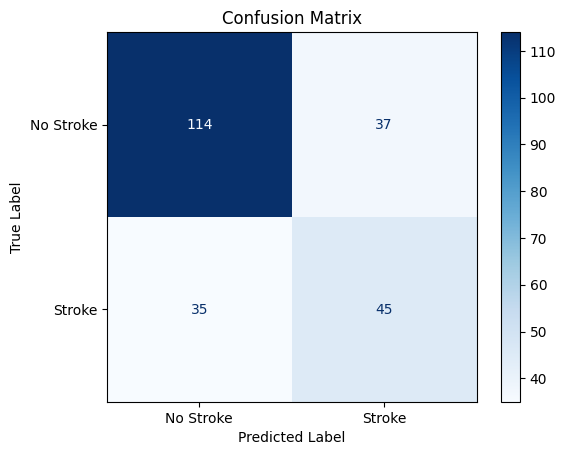

In [37]:

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assume cm is your confusion matrix (e.g., from confusion_matrix(y_true, y_pred))
disp = ConfusionMatrixDisplay(cm, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [38]:
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# from sklearn.decomposition import PCA
# pca= PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# x_test = pca.transform(x_test)

# explained_variance = pca.explained_variance_ratio_

In [39]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [40]:
# vor=Voronoi(X_train)
# fig=voronoi_plot_2d(vor)
# plt.title('Voronoi Plot')
# plt.show()

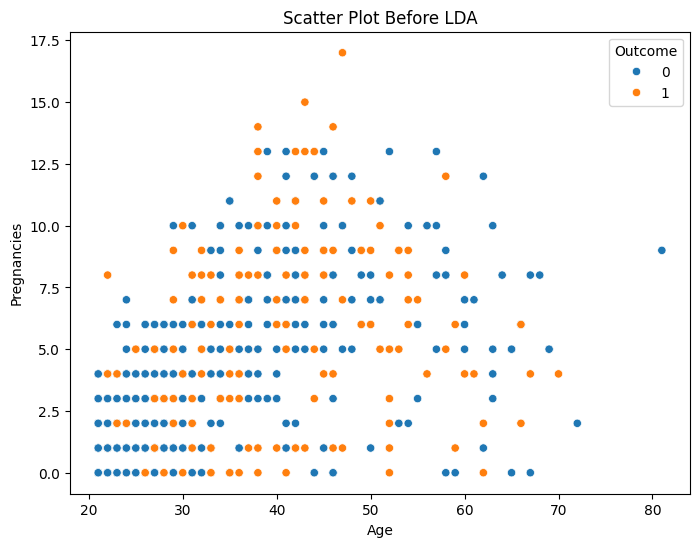

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Pregnancies', data=df,hue='Outcome')
plt.title('Scatter Plot Before LDA')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.show()

In [42]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

X = df.drop('Outcome',axis=1)
y = df['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=42)

model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
model.score(X_train,y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.4f}%')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Accuracy: 73.1602%
[[120  31]
 [ 31  49]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.61      0.61      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



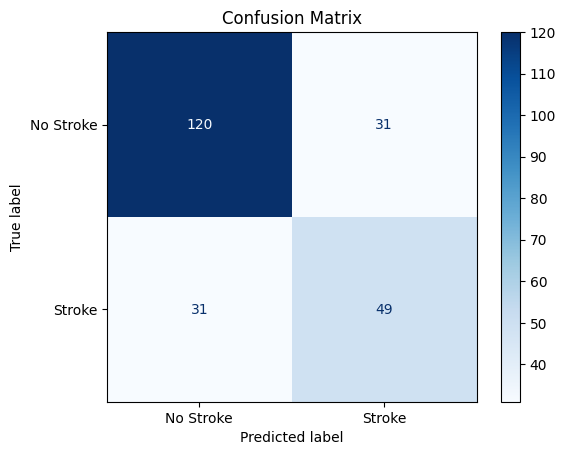

In [45]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(cm,display_labels=['No Stroke','Stroke'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

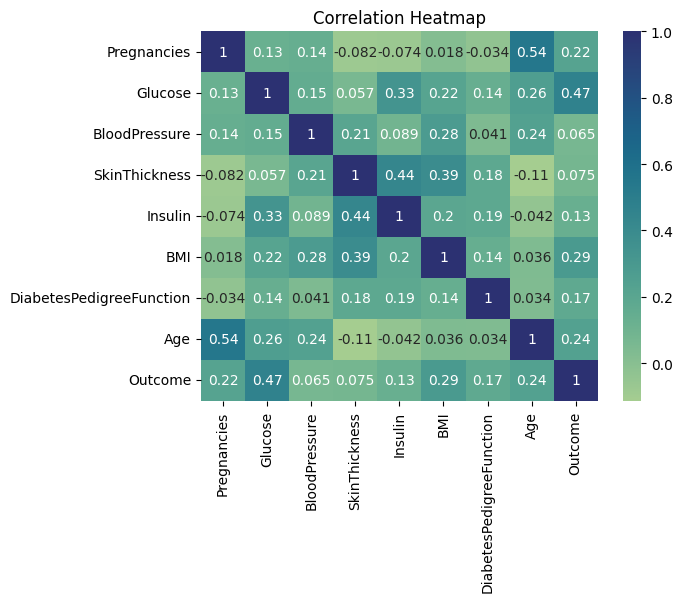

In [46]:
# plt.figure(figsize=(6,5))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(),annot=True,cmap="crest")
# plt.show()

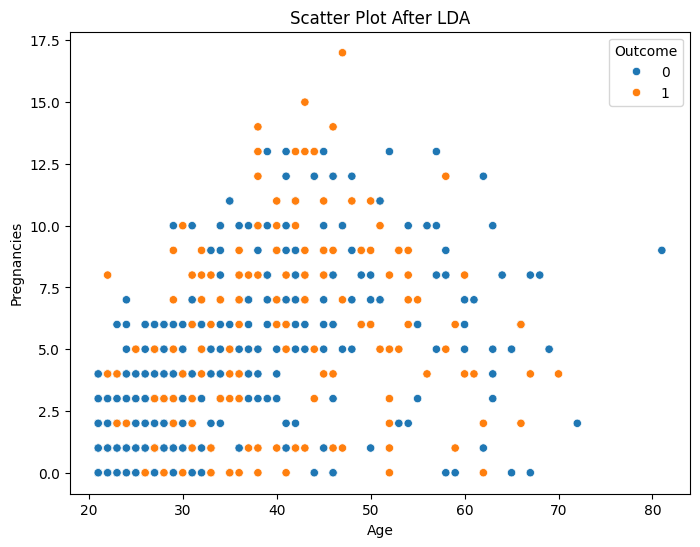

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Pregnancies', data=df, hue='Outcome')
plt.title('Scatter Plot After LDA')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.show()